In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import username, password, host
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#stats
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import wrangle as w
import explore as e
import warnings
warnings.filterwarnings("ignore")
import os
directory = os.getcwd()

In [2]:
concrete = pd.read_csv('concrete.csv')
df = w.prepared_concrete_data(concrete)
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total_lbs_per_yd^3
sample,,,,,,,,,,
0,311.512806,467.379440,0.000000,448.640170,0.000000,2142.449716,1650.158070,28,4335.18582,5020.0
1,372.360318,93.034964,274.034266,348.991346,23.809896,2382.753296,1755.318444,14,3409.84338,5250.0
2,551.155000,0.000000,210.982134,413.145788,12.125410,2109.600878,1898.618744,28,4238.01036,5196.0
3,586.428920,251.326680,0.000000,502.653360,0.000000,2054.705840,1477.095400,28,6649.99230,4872.0
4,341.275176,404.327308,0.000000,426.153046,20.062042,2309.118988,1535.958754,28,2652.74502,5037.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,619.868297,230.396821,224.871240,424.113772,601.640798,771.617000,1190.494800
slag,1030.0,162.912214,190.213162,0.000000,0.000000,48.501640,315.150429,792.340428
ash,1030.0,119.464719,141.089075,0.000000,0.000000,0.000000,260.806546,441.144462
water,1030.0,400.286860,47.077937,268.522716,363.541838,407.854700,423.287040,544.541140
superplastic,1030.0,13.678918,13.170050,0.000000,0.000000,14.109568,22.487124,70.988764
coarseagg,1030.0,2144.916536,171.417922,1765.900620,2054.705840,2134.072160,2269.435828,2524.289900
fineagg,1030.0,1705.451010,176.757569,1309.544280,1611.466989,1718.501290,1816.606880,2188.305812
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,5194.965451,2422.967403,337.938540,3438.850980,4995.833910,6691.328130,11980.138800
total_lbs_per_yd^3,1030.0,5166.579612,144.095702,4838.000000,5051.250000,5179.000000,5270.000000,5624.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   slag                1030 non-null   float64
 2   ash                 1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplastic        1030 non-null   float64
 5   coarseagg           1030 non-null   float64
 6   fineagg             1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
 9   total_lbs_per_yd^3  1030 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 88.5 KB


In [5]:
# checking for possible categorical features
df.nunique()

cement                278
slag                  185
ash                   156
water                 195
superplastic          111
coarseagg             284
fineagg               302
age                    14
strength              845
total_lbs_per_yd^3    255
dtype: int64

In [6]:
cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'total_lbs_per_yd^3']

## EXPLORE
### Univariate

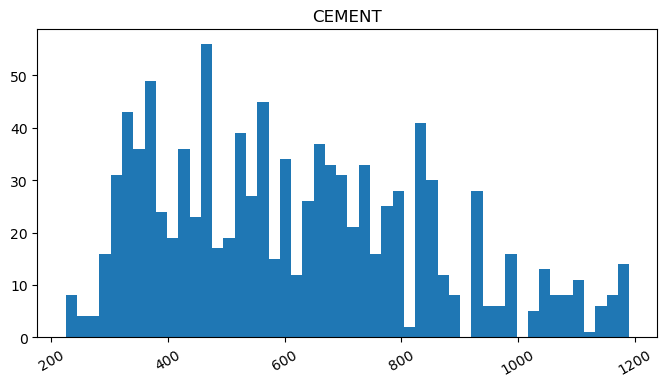

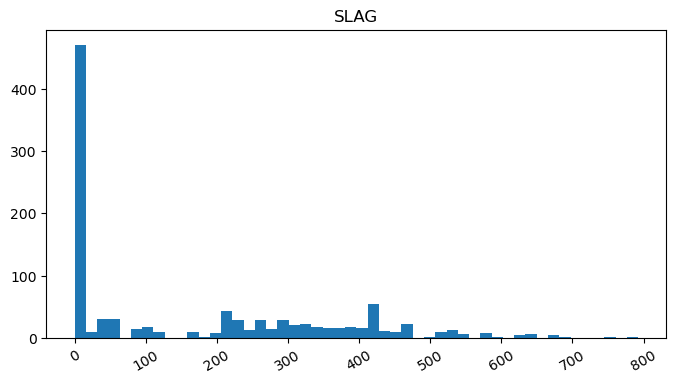

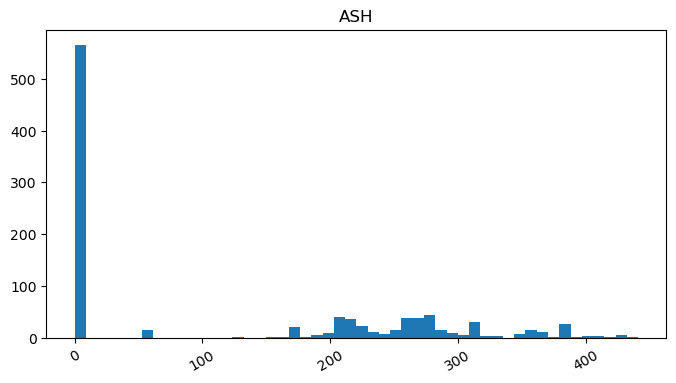

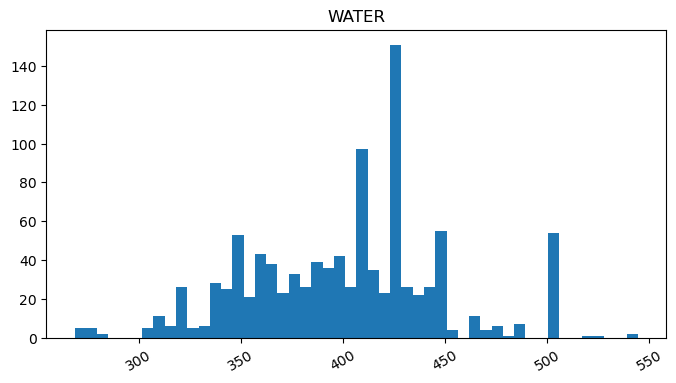

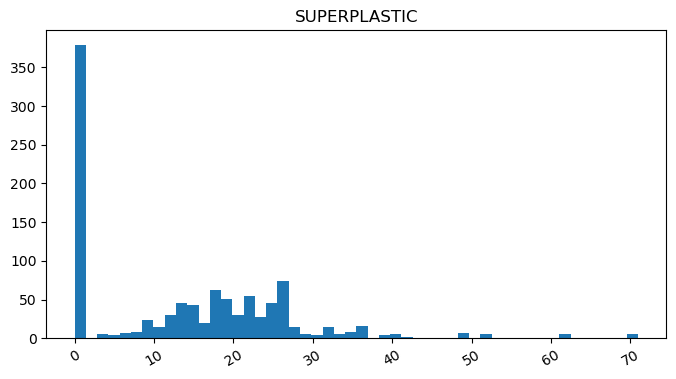

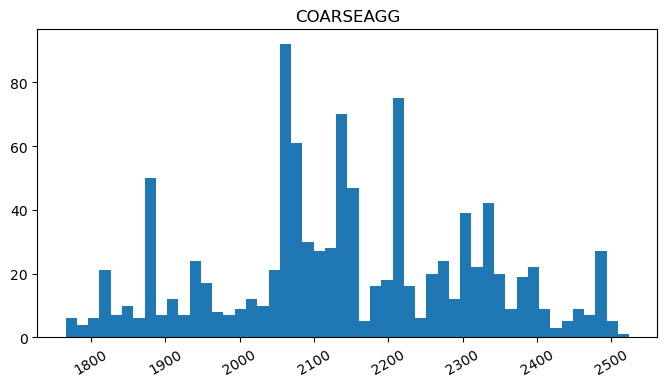

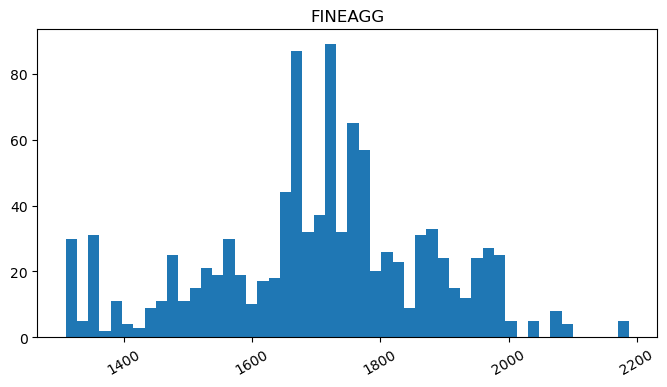

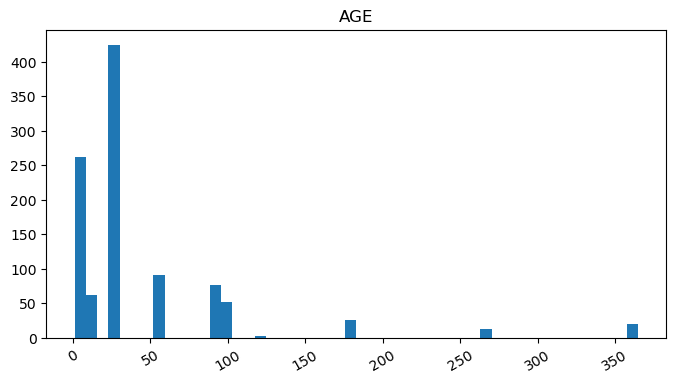

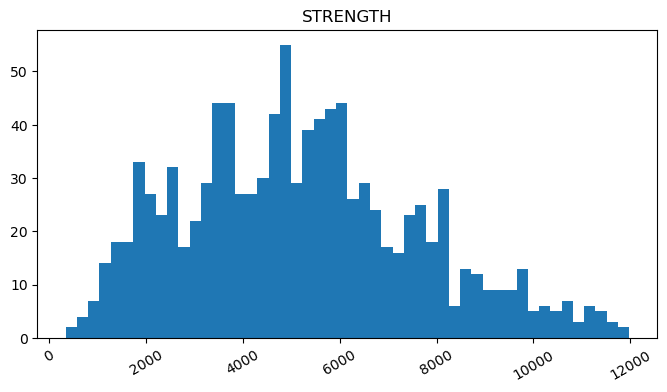

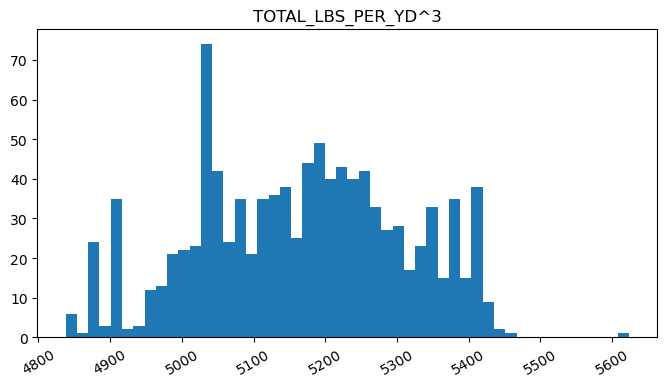

In [7]:
# Set a larger size for individual plots
individual_fig_size = (8, 4)

for col in cols:
    plt.figure(figsize=individual_fig_size)
    plt.title(col.upper()) # Convert title to uppercase
    df[col].hist(bins=50)
    plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
    plt.grid(False)
    plt.show()  # Show each plot individually

In [8]:
df.strength.describe()

count     1030.000000
mean      5194.965451
std       2422.967403
min        337.938540
25%       3438.850980
50%       4995.833910
75%       6691.328130
max      11980.138800
Name: strength, dtype: float64

# SPLIT

In [9]:
train, validate, test = e.split_data(df)


    train -> (618, 10)
    validate -> (206, 10)
    test -> (206, 10)


In [10]:
train.head(3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total_lbs_per_yd^3
sample,,,,,,,,,,
600,610.67974,0.0000,0.00000,421.08242,0.000000,2134.07216,1887.15472,3,1647.63168,5053.0
160,729.72922,0.0000,0.00000,423.28704,0.000000,2156.11836,1818.81150,28,4561.44510,5128.0
854,853.18794,44.0924,207.23428,346.12534,25.573592,2067.93356,1862.90390,3,5042.97126,5407.0


sns.pairplot(data=train, corner=True)
plt.show()

# SCALING

In [11]:
train_scaled, validate_scaled, test_scaled = e.preprocess_concrete(df)


    train -> (618, 10)
    validate -> (206, 10)
    test -> (206, 10)


## Hypotheses:

### Q1. Is there a relationship between cement [content] and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between cement and strength

$H_a$ : There is a linear correlation between cement and strength

In [12]:
train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,total_lbs_per_yd^3,strength
sample,,,,,,,,,,
600,0.399543,0.000000,0.000000,0.552716,0.000000,0.501050,0.657301,0.005495,0.3440,1647.63168
160,0.522831,0.000000,0.000000,0.560703,0.000000,0.531053,0.579528,0.074176,0.4640,4561.44510
854,0.650685,0.055648,0.469765,0.281150,0.360248,0.411041,0.629704,0.005495,0.9104,5042.97126
120,0.522831,0.000000,0.000000,0.560703,0.000000,0.531053,0.579528,0.016484,0.4640,2358.31788
979,0.737443,0.295771,0.000000,0.236422,0.577640,0.405041,0.526091,0.074176,0.8688,8963.34840


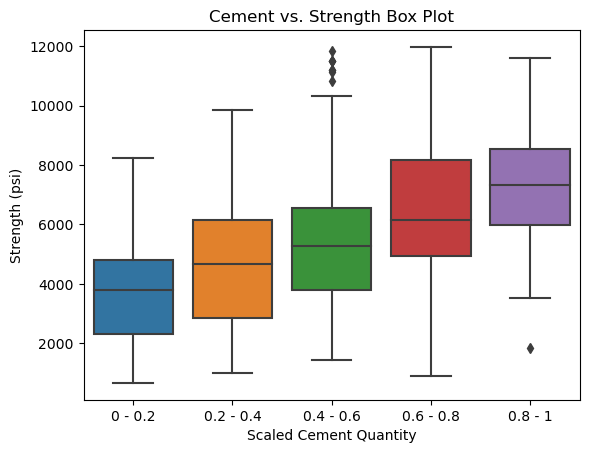

In [13]:
# Assuming train_scaled is your DataFrame
# Create bins for the 'cement' feature
bins = pd.cut(train_scaled['cement'], bins=5, labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to your DataFrame
train_scaled['cement_bins'] = bins

# Now create the boxplot
sns.boxplot(x='cement_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Cement Quantity')
plt.ylabel('Strength (psi)')
plt.title('Cement vs. Strength Box Plot')
plt.show()


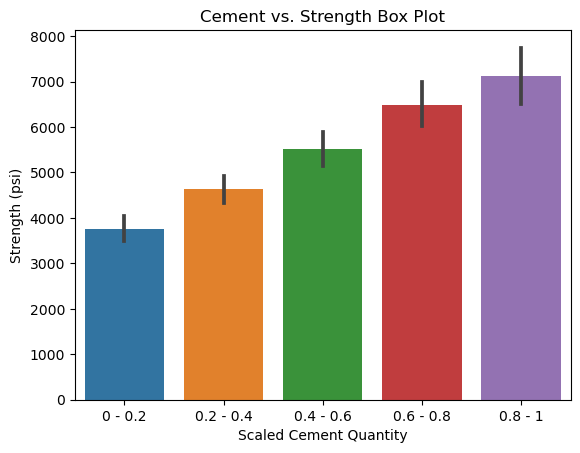

In [14]:
# Now create the barplot
sns.barplot(x='cement_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Cement Quantity')
plt.ylabel('Strength (psi)')
plt.title('Cement vs. Strength Box Plot')
plt.show()

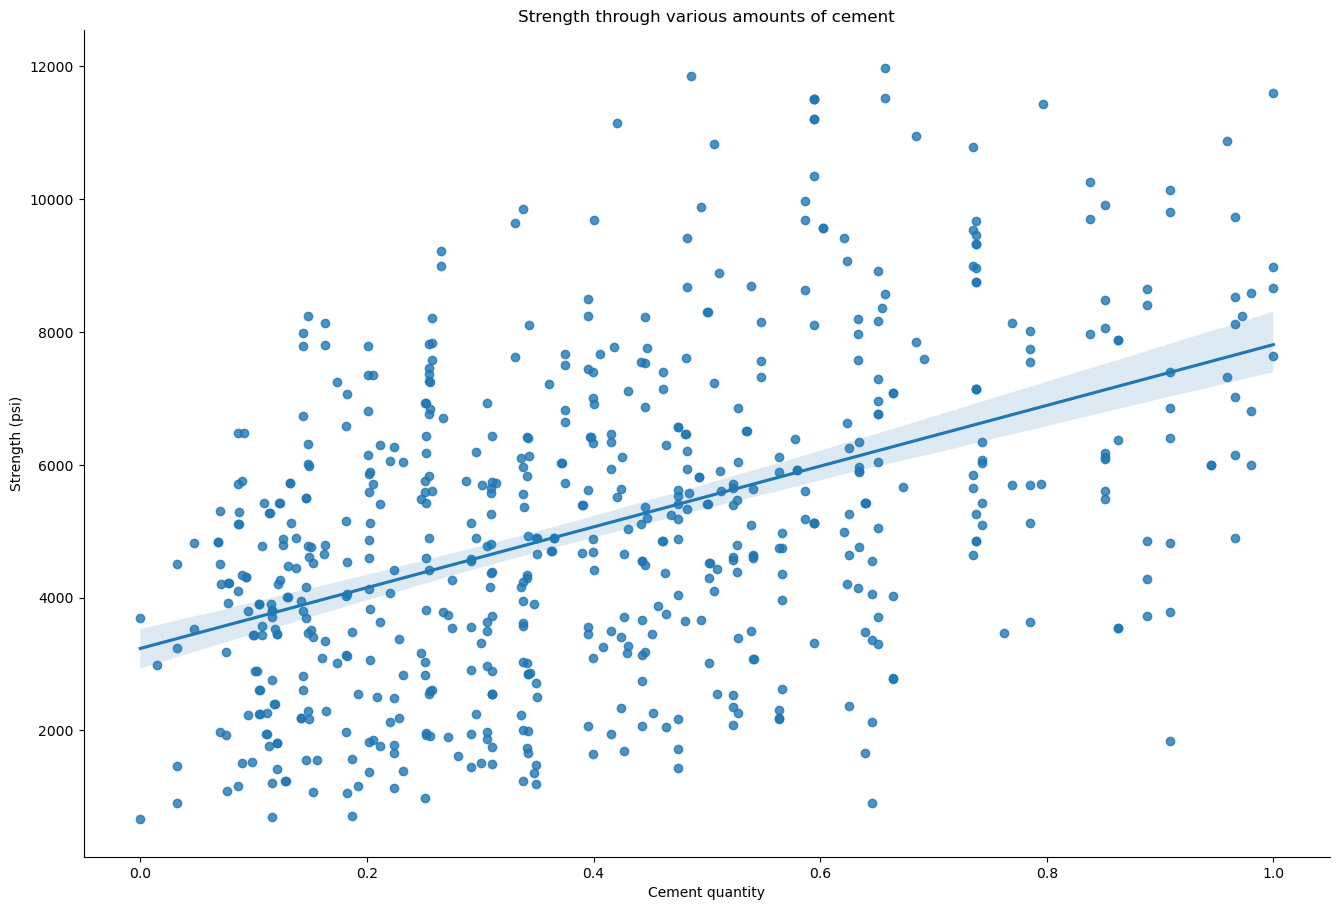

In [15]:
# plotting cement and strenght

sns.lmplot(data=train_scaled, x='cement', y='strength', markers='o', height = 9, aspect = 1.5)
plt.title('Strength through various amounts of cement')
plt.ylabel('Strength (psi)')
plt.xlabel('Cement quantity')
plt.show()

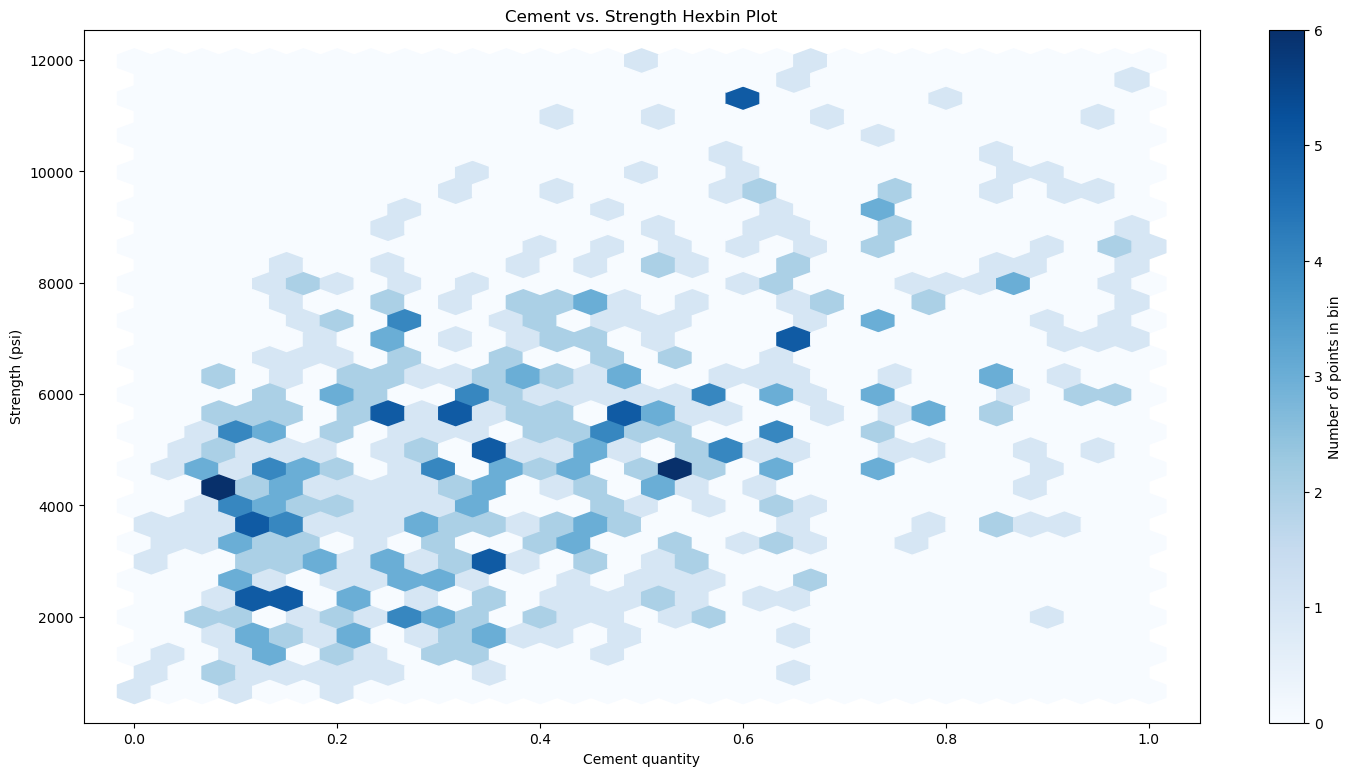

In [16]:
plt.figure(figsize=(18, 9))
plt.hexbin(train_scaled['cement'], train_scaled['strength'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of points in bin')
plt.xlabel('Cement quantity')
plt.ylabel('Strength (psi)')
plt.title('Cement vs. Strength Hexbin Plot')
plt.show()


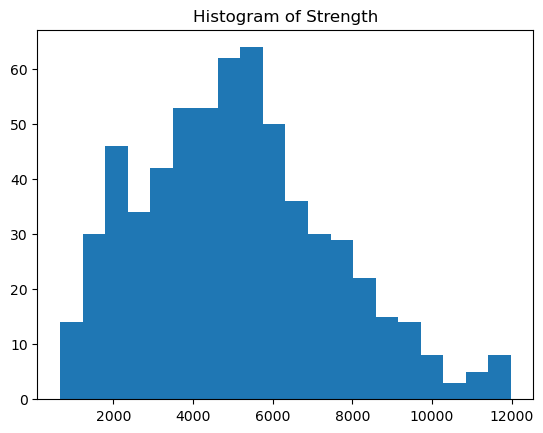

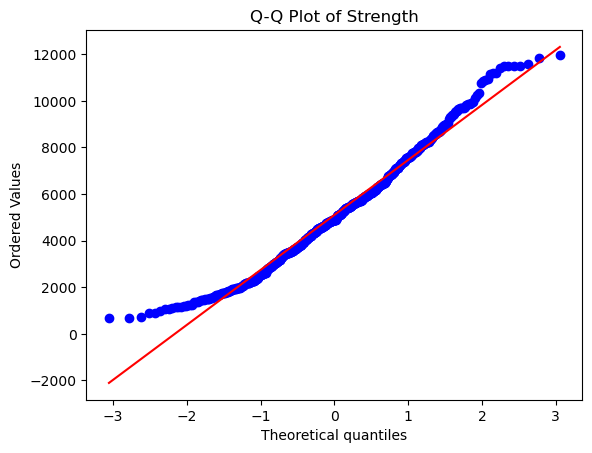

Shapiro-Wilk Test: Statistic=0.978, p-value=0.000
D’Agostino’s K^2 Test: Statistic=20.799, p-value=0.000
Anderson-Darling Test: Statistic=2.376
15.000: 0.572, data does not look normal (reject H0)
10.000: 0.652, data does not look normal (reject H0)
5.000: 0.782, data does not look normal (reject H0)
2.500: 0.912, data does not look normal (reject H0)
1.000: 1.085, data does not look normal (reject H0)


In [17]:
# Graphical Method - Histogram
plt.hist(train_scaled['strength'], bins=20)
plt.title('Histogram of Strength')
plt.show()

# Graphical Method - Q-Q Plot
stats.probplot(train_scaled['strength'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Strength')
plt.show()

# Statistical Test - Shapiro-Wilk Test
shapiro_test = stats.shapiro(train_scaled['strength'])
print('Shapiro-Wilk Test: Statistic=%.3f, p-value=%.3f' % (shapiro_test.statistic, shapiro_test.pvalue))

# Statistical Test - D’Agostino’s K^2 Test
k2, p = stats.normaltest(train_scaled['strength'])
print('D’Agostino’s K^2 Test: Statistic=%.3f, p-value=%.3f' % (k2, p))

# Statistical Test - Anderson-Darling Test
anderson_test = stats.anderson(train_scaled['strength'], dist='norm')
print('Anderson-Darling Test: Statistic=%.3f' % anderson_test.statistic)
for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


In [18]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['cement'], train_scaled['strength'])
print('Spearman correlation between cement and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between cement and strength: Correlation=0.448, p-value=0.000


In [19]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.447937
P-value: 7.878448102115859e-32


## We reject H₀, there is a monotonic relationship between cememt and strength

## Hypotheses:

### Q2. Is there a relationship between water and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between water and strength

$H_a$ : There is a linear correlation between water and strength

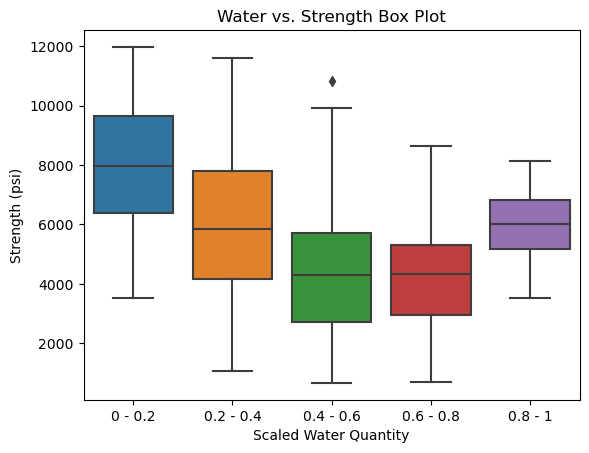

In [20]:
# Assuming train_scaled is your DataFrame
# Create bins for the 'cement' feature
bins = pd.cut(train_scaled['water'], bins=5, labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to your DataFrame
train_scaled['water_bins'] = bins

# Now create the boxplot
sns.boxplot(x='water_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Water Quantity')
plt.ylabel('Strength (psi)')
plt.title('Water vs. Strength Box Plot')
plt.show()


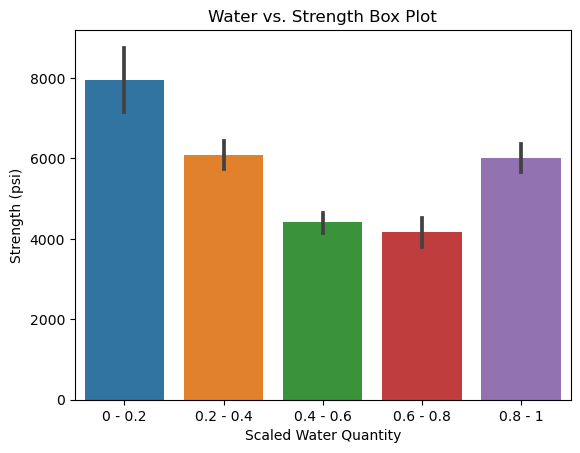

In [21]:
# Now create the barplot
sns.barplot(x='water_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Water Quantity')
plt.ylabel('Strength (psi)')
plt.title('Water vs. Strength Box Plot')
plt.show()

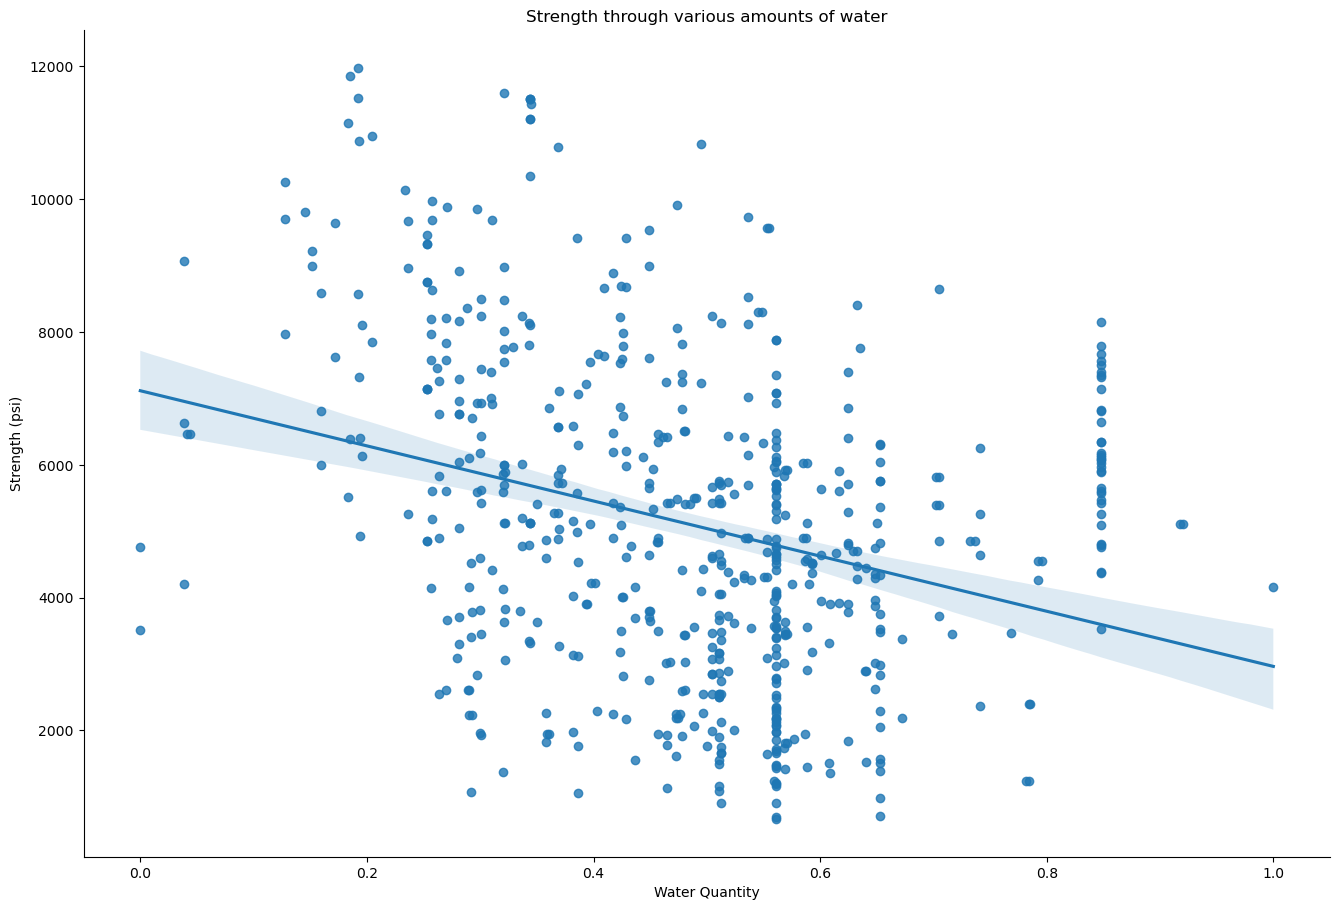

In [22]:
# plotting water and strenght

sns.lmplot(data=train_scaled, x='water', y='strength', markers='o', height = 9, aspect = 1.5)
plt.title('Strength through various amounts of water')
plt.ylabel('Strength (psi)')
plt.xlabel('Water Quantity')
plt.show()

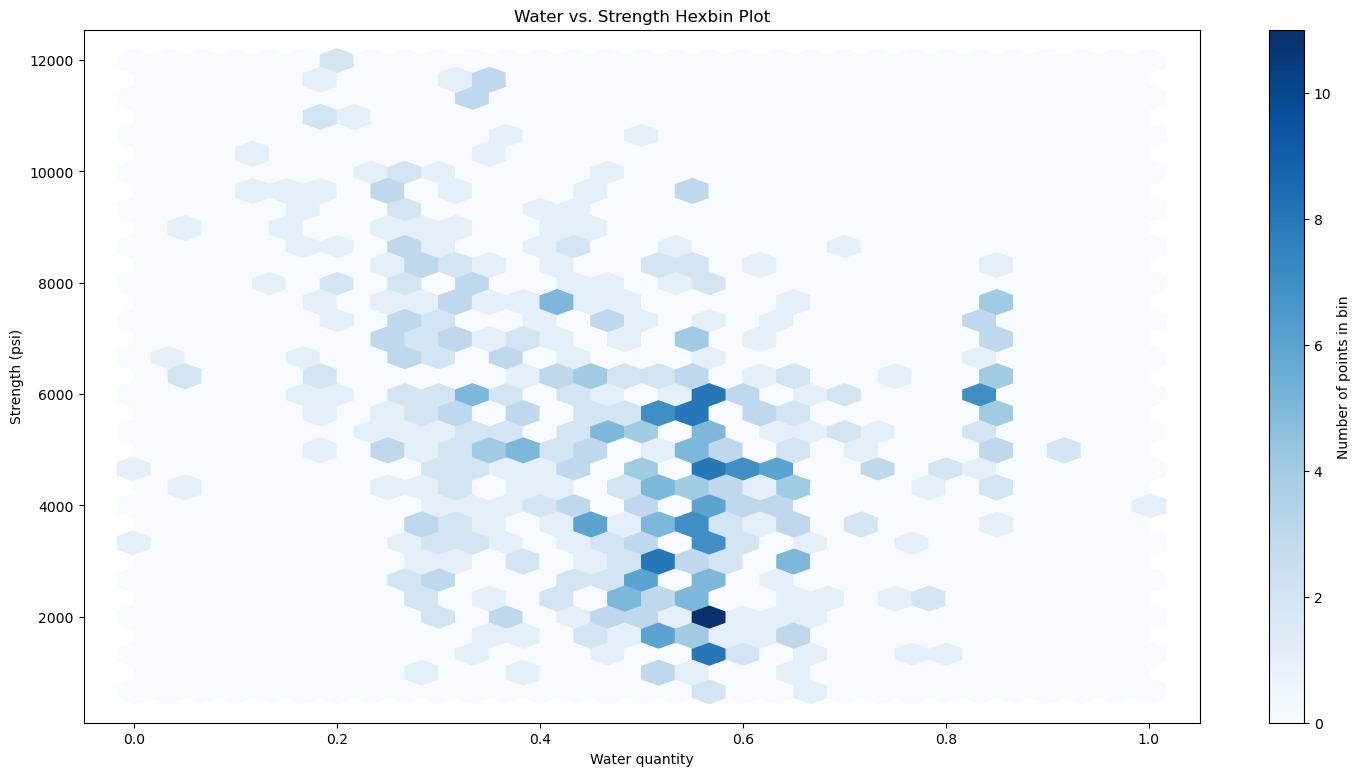

In [23]:
plt.figure(figsize=(18, 9))
plt.hexbin(train_scaled['water'], train_scaled['strength'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of points in bin')
plt.xlabel('Water quantity')
plt.ylabel('Strength (psi)')
plt.title('Water vs. Strength Hexbin Plot')
plt.show()


In [24]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['water'], train_scaled['strength'])
print('Spearman correlation between water and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between water and strength: Correlation=-0.310, p-value=0.000


In [25]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: -0.309739
P-value: 3.3006348962393877e-15


## We reject H₀, there is a monotonic relationship between water and strength

## Hypotheses:

### Q3. Is there a relationship between coarseagg and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between coarseagg and strength

$H_a$ : There is a linear correlation between coarseagg and strength

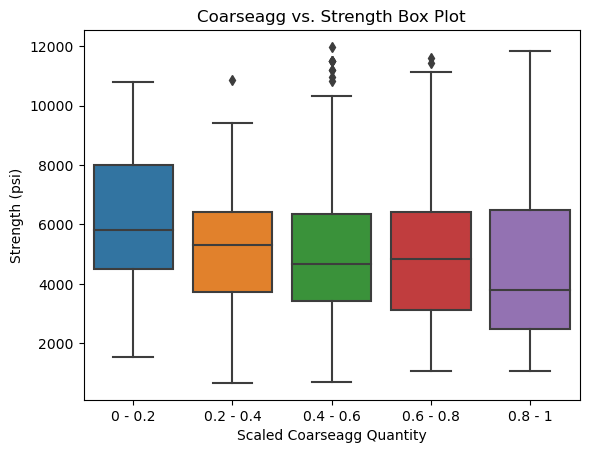

In [26]:
# Assuming train_scaled is your DataFrame
# Create bins for the 'coarseagg' feature
bins = pd.cut(train_scaled['coarseagg'], bins=5, labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to your DataFrame
train_scaled['coarseagg_bins'] = bins

# Now create the boxplot
sns.boxplot(x='coarseagg_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Coarseagg Quantity')
plt.ylabel('Strength (psi)')
plt.title('Coarseagg vs. Strength Box Plot')
plt.show()


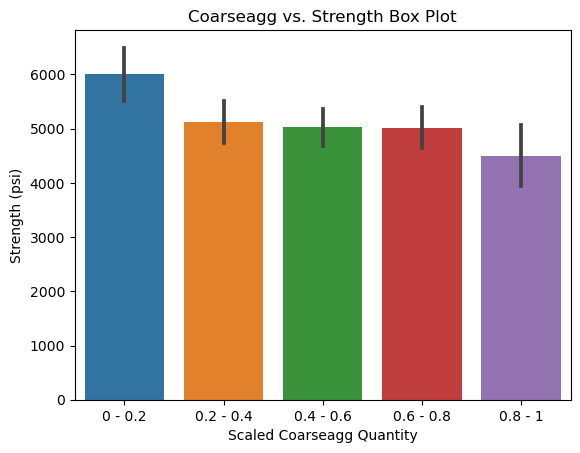

In [27]:
# Now create the barplot
sns.barplot(x='coarseagg_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Coarseagg Quantity')
plt.ylabel('Strength (psi)')
plt.title('Coarseagg vs. Strength Box Plot')
plt.show()

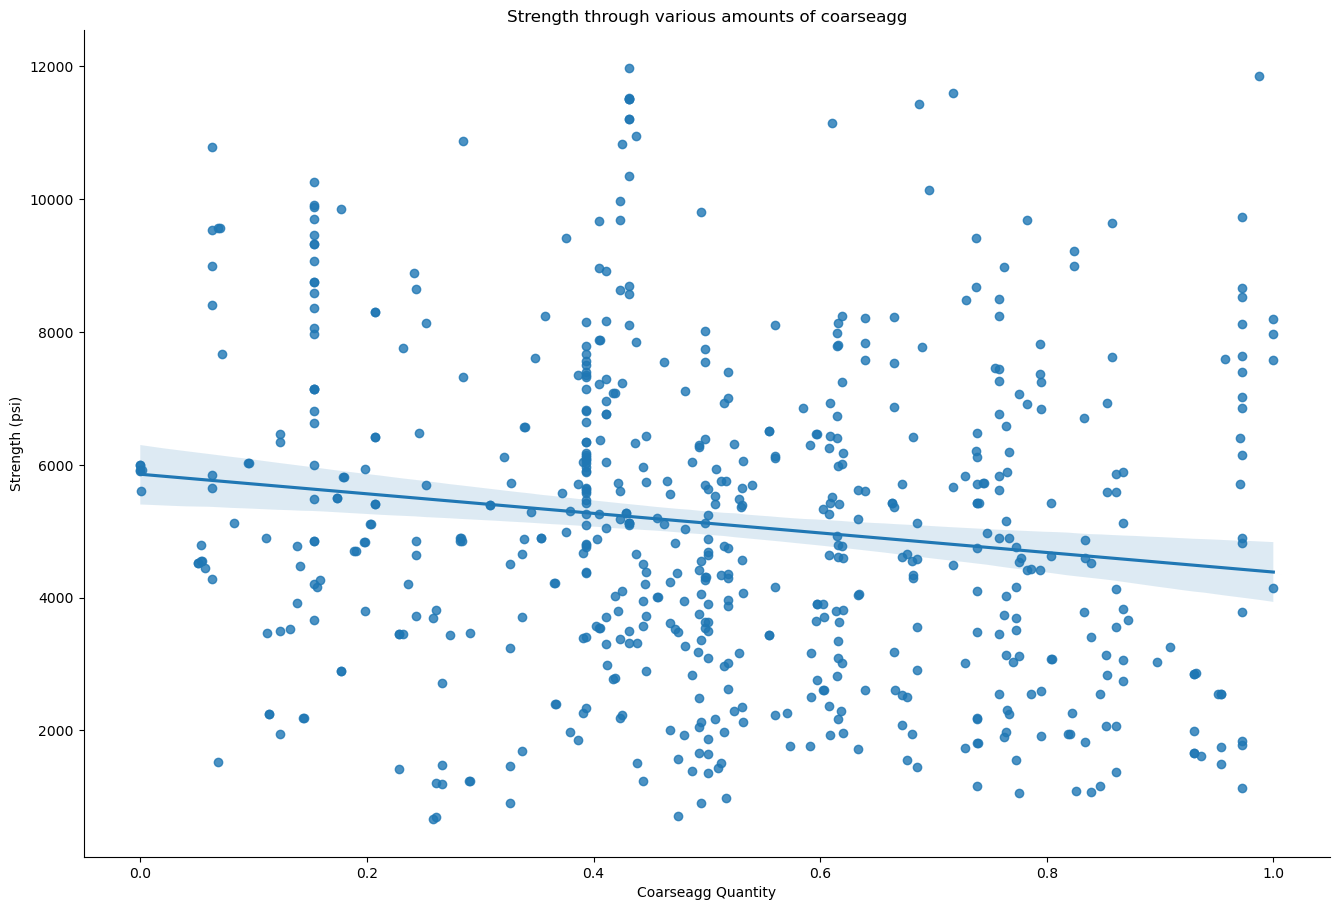

In [28]:
# plotting coarseagg and strenght

sns.lmplot(data=train_scaled, x='coarseagg', y='strength', markers='o', height = 9, aspect = 1.5)
plt.title('Strength through various amounts of coarseagg')
plt.ylabel('Strength (psi)')
plt.xlabel('Coarseagg Quantity')
plt.show()

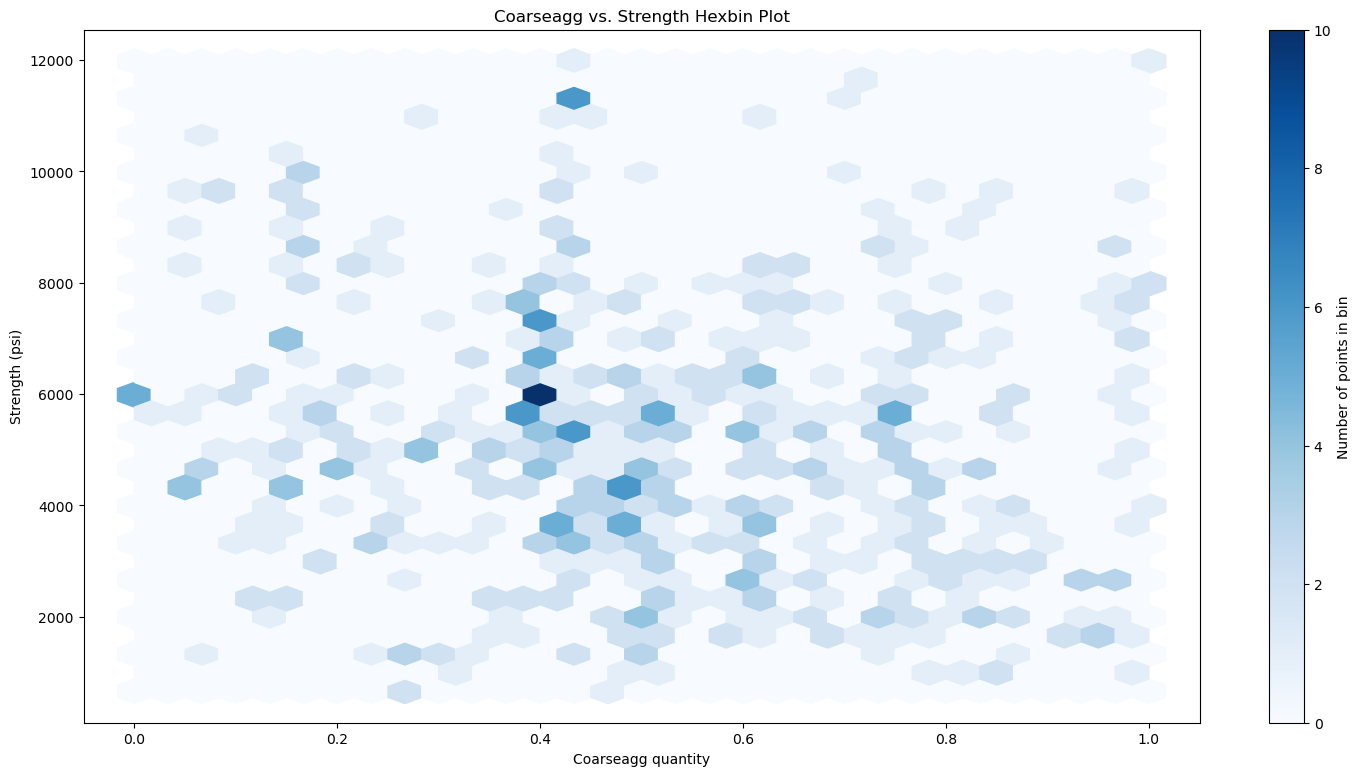

In [29]:
plt.figure(figsize=(18, 9))
plt.hexbin(train_scaled['coarseagg'], train_scaled['strength'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of points in bin')
plt.xlabel('Coarseagg quantity')
plt.ylabel('Strength (psi)')
plt.title('Coarseagg vs. Strength Hexbin Plot')
plt.show()


In [30]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['coarseagg'], train_scaled['strength'])
print('Spearman correlation between coarseagg and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between coarseagg and strength: Correlation=-0.161, p-value=0.000


In [31]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: -0.160773
P-value: 5.949473233725961e-05


## We reject H₀, there is a monotonic relationship between coarseagg and strength

## Hypotheses:

### Q4. Is there a relationship between total_lbs_per_yd^3 and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between total_lbs_per_yd^3 and strength

$H_a$ : There is a linear correlation between total_lbs_per_yd^3 and strength

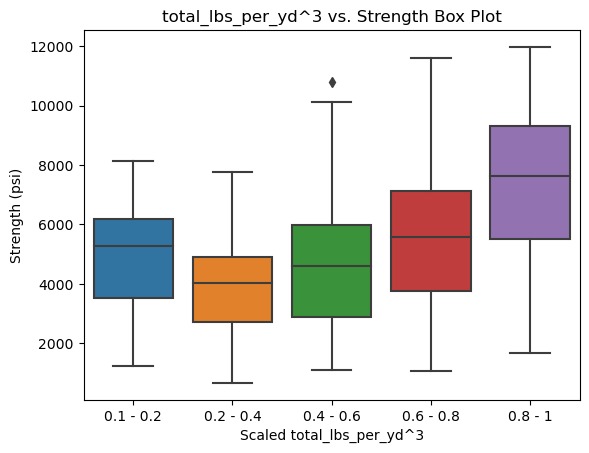

In [32]:
# Assuming train_scaled is your DataFrame
# Create bins for the 'cement' feature
bins = pd.cut(train_scaled['total_lbs_per_yd^3'], bins=5, labels=['0.1 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to your DataFrame
train_scaled['total_lbs_per_yd^3_bins'] = bins

# Now create the boxplot
sns.boxplot(x='total_lbs_per_yd^3_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled total_lbs_per_yd^3')
plt.ylabel('Strength (psi)')
plt.title('total_lbs_per_yd^3 vs. Strength Box Plot')
plt.show()


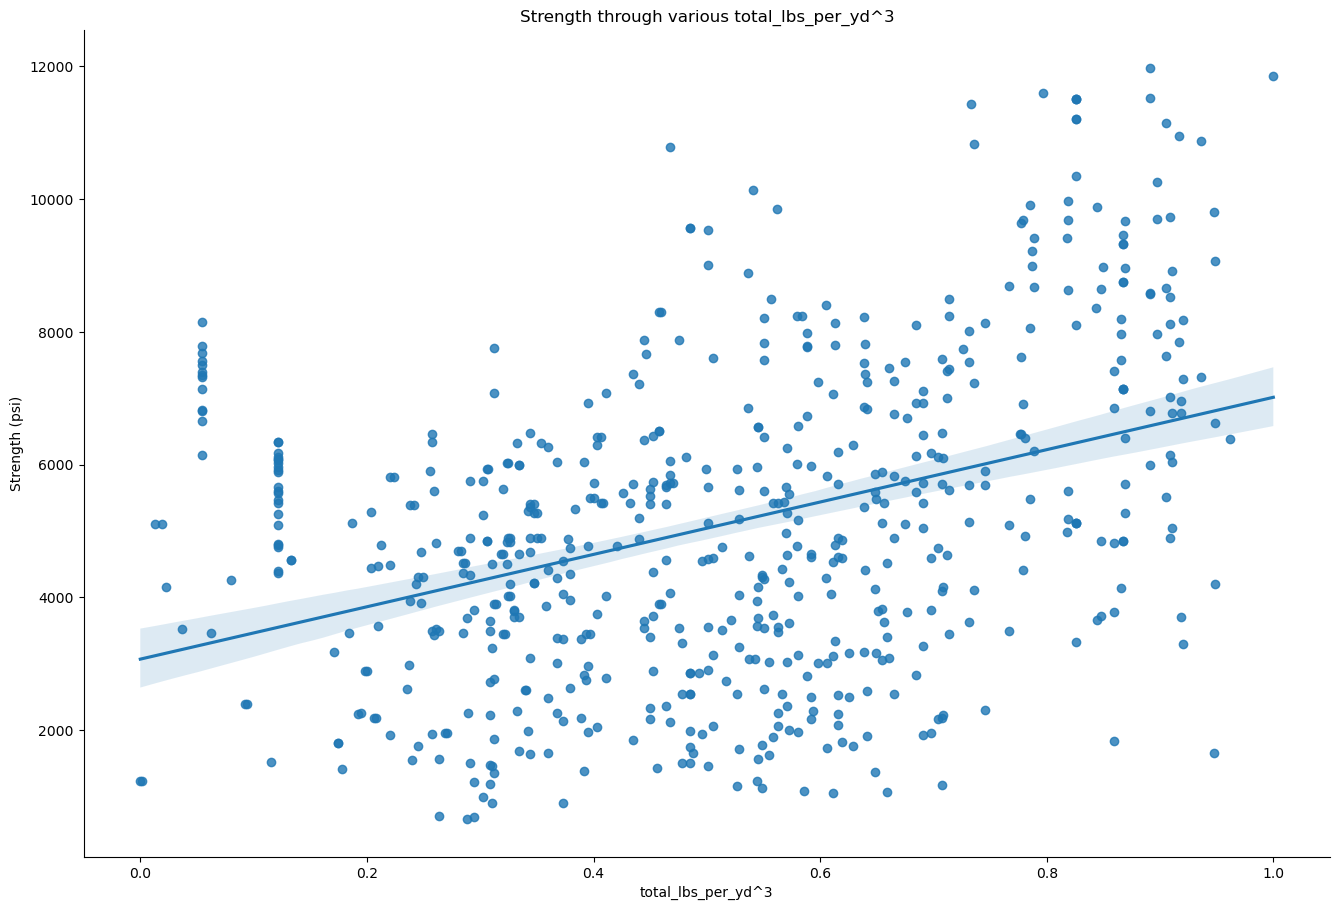

In [33]:
# plotting water and strenght

sns.lmplot(data=train_scaled, x='total_lbs_per_yd^3', y='strength', markers='o', height = 9, aspect = 1.5)
plt.title('Strength through various total_lbs_per_yd^3')
plt.ylabel('Strength (psi)')
plt.xlabel('total_lbs_per_yd^3')
plt.show()

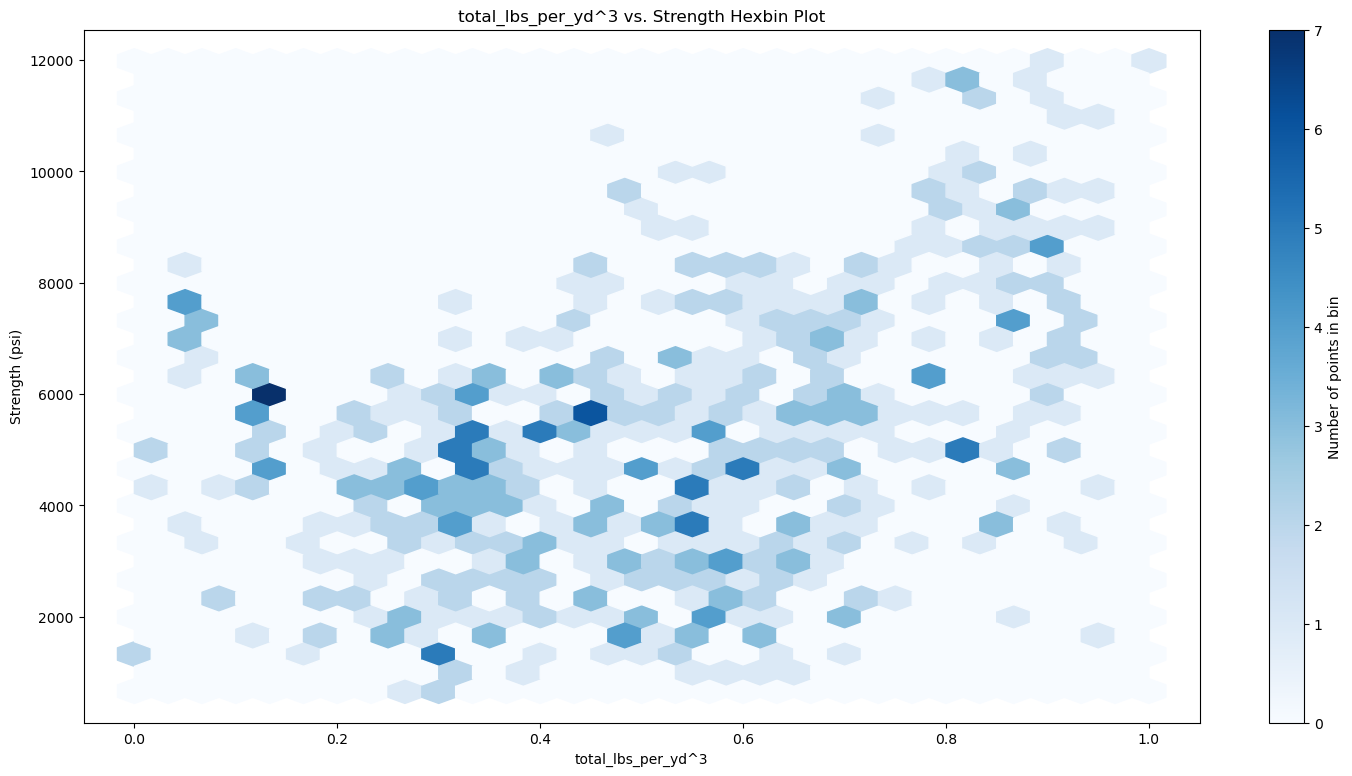

In [34]:
plt.figure(figsize=(18, 9))
plt.hexbin(train_scaled['total_lbs_per_yd^3'], train_scaled['strength'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of points in bin')
plt.xlabel('total_lbs_per_yd^3')
plt.ylabel('Strength (psi)')
plt.title('total_lbs_per_yd^3 vs. Strength Hexbin Plot')
plt.show()


In [35]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['total_lbs_per_yd^3'], train_scaled['strength'])
print('Spearman correlation between total_lbs_per_yd^3 and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between total_lbs_per_yd^3 and strength: Correlation=0.361, p-value=0.000


In [36]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.360755
P-value: 1.971966600003703e-20


## We reject H₀, there is a monotonic relationship between total_lbs_per_yd^3 and strength

## Hypotheses:

### Q5. Is there a relationship between fineagg and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between fineragg and strength

$H_a$ : There is a linear correlation between fineragg and strength

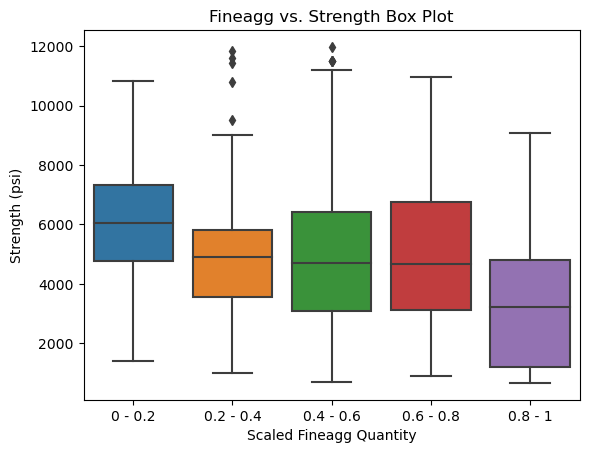

In [37]:
# Assuming train_scaled is your DataFrame
# Create bins for the 'coarseagg' feature
bins = pd.cut(train_scaled['fineagg'], bins=5, labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to your DataFrame
train_scaled['fineagg_bins'] = bins

# Now create the boxplot
sns.boxplot(x='fineagg_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Fineagg Quantity')
plt.ylabel('Strength (psi)')
plt.title('Fineagg vs. Strength Box Plot')
plt.show()


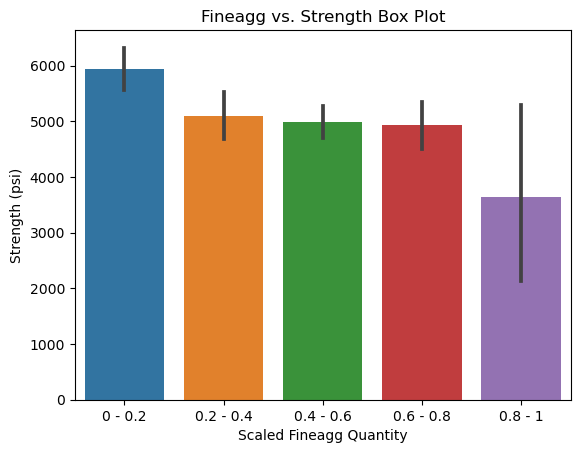

In [38]:
# Now create the barplot
sns.barplot(x='fineagg_bins', y='strength', data=train_scaled)
plt.xlabel('Scaled Fineagg Quantity')
plt.ylabel('Strength (psi)')
plt.title('Fineagg vs. Strength Box Plot')
plt.show()

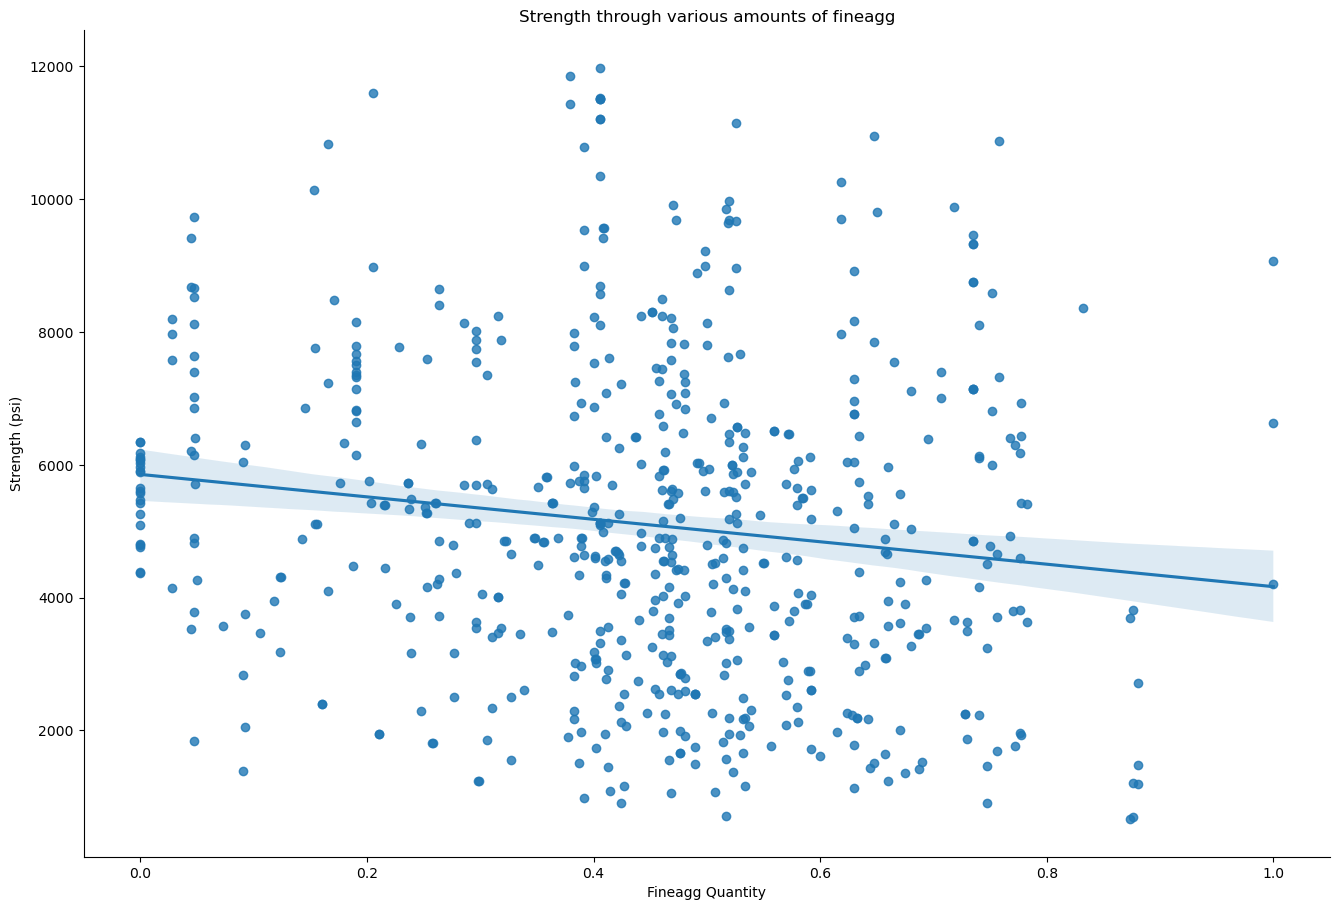

In [39]:
# plotting coarseagg and strenght

sns.lmplot(data=train_scaled, x='fineagg', y='strength', markers='o', height = 9, aspect = 1.5)
plt.title('Strength through various amounts of fineagg')
plt.ylabel('Strength (psi)')
plt.xlabel('Fineagg Quantity')
plt.show()

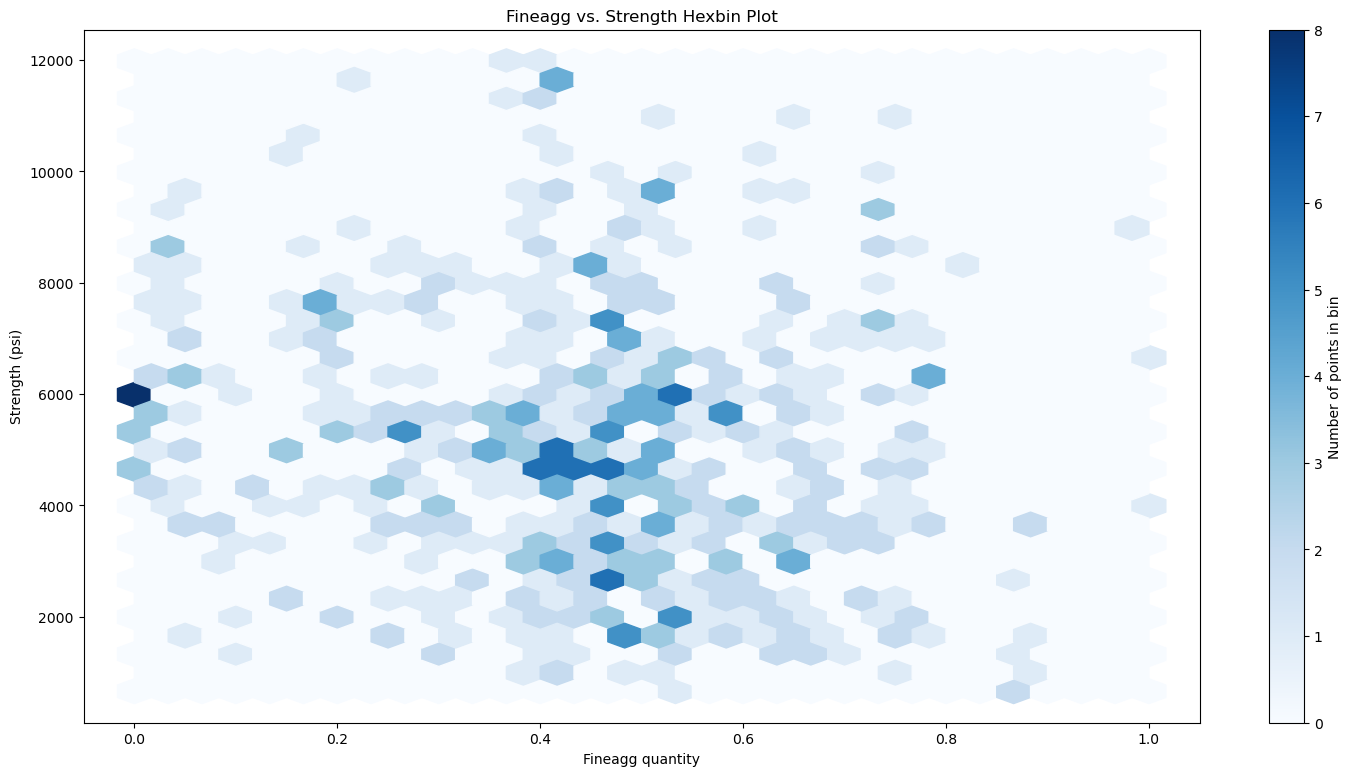

In [40]:
plt.figure(figsize=(18, 9))
plt.hexbin(train_scaled['fineagg'], train_scaled['strength'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of points in bin')
plt.xlabel('Fineagg quantity')
plt.ylabel('Strength (psi)')
plt.title('Fineagg vs. Strength Hexbin Plot')
plt.show()


In [41]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['fineagg'], train_scaled['strength'])
print('Spearman correlation between fineagg and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between fineagg and strength: Correlation=-0.162, p-value=0.000


In [42]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: -0.161849
P-value: 5.298832650597833e-05


## We reject H₀, there is a monotonic relationship between fineagg and strength

## Explore summary:
- `cement` has the greatest correlation with strength of concrete with an r-value of 0.45 and an alpha under 0.05.

- `total_lbs_per_yd^3` has a correlation r-value of 0.36 and an alpha under 0.05 in relation to concrete strength.

- `water` has a correlation r-value of -0.31 and an alpha under 0.05 in relation to concrete strength.

- `coarseagg` has a correlation r-value of -0.16 and an alpha under 0.05 in relation to concrete strength.

sns.pairplot(data=train_scaled, corner=True, hue='strength')
plt.show()

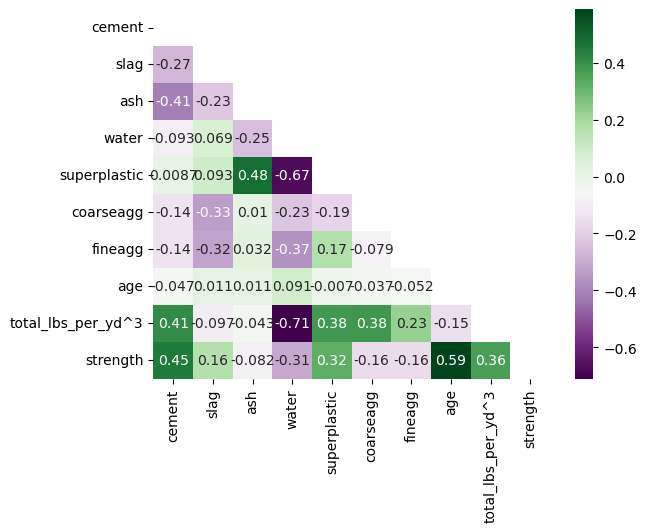

In [43]:
concrete_corr = train_scaled.corr(method='spearman')
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(concrete_corr, cmap='PRGn', annot=True, 
            mask=np.triu(concrete_corr))
plt.show();